In [ ]:
                                            #HR Analytics

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE


In [26]:
# Load the dataset from the URL
url = "https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/HR%20Analytics/ibm-hr-analytics-employee-attrition-performance.zip"
hr_data = pd.read_csv(url, compression='zip')


In [13]:
# Handle missing values and encode categorical variables
X = pd.get_dummies(hr_data.drop(columns=['Attrition']), drop_first=True)
y = (hr_data['Attrition'] == 'Yes').astype(int)


In [14]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Check for class imbalance
if y_train.mean() < 0.2 or y_train.mean() > 0.8:
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)


In [16]:
# Define pipelines for different models
pipelines = {
    'RandomForest': Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier())]),
    'GradientBoosting': Pipeline([('scaler', StandardScaler()), ('gb', GradientBoostingClassifier())]),
    'SVM': Pipeline([('scaler', StandardScaler()), ('svm', SVC(probability=True))])
}


In [17]:
# Define parameter grids for hyperparameter tuning
param_grids = {
    'RandomForest': {
        'rf__n_estimators': [100, 200, 300],
        'rf__max_depth': [None, 5, 10],
        'rf__min_samples_split': [2, 5, 10],
        'rf__min_samples_leaf': [1, 2, 4],
        'rf__bootstrap': [True, False]
    },
    'GradientBoosting': {
        'gb__n_estimators': [100, 200, 300],
        'gb__learning_rate': [0.01, 0.05, 0.1],
        'gb__max_depth': [3, 5, 7],
        'gb__min_samples_split': [2, 5, 10]
    },
    'SVM': {
        'svm__C': [0.1, 1, 10],
        'svm__kernel': ['linear', 'rbf']
    }
}


In [18]:
# Train and tune models
best_model = None
best_score = 0

for model_name, pipeline in pipelines.items():
    print(f"Training {model_name}...")
    grid_search = RandomizedSearchCV(pipeline, param_grids[model_name], cv=5, scoring='roc_auc', n_iter=10, random_state=42)
    grid_search.fit(X_train, y_train)
    score = grid_search.best_score_
    print(f"{model_name} AUC-ROC Score: {score}")
    if score > best_score:
        best_model = grid_search.best_estimator_
        best_score = score


Training RandomForest...
RandomForest AUC-ROC Score: 0.9744022522666838
Training GradientBoosting...
GradientBoosting AUC-ROC Score: 0.9682847157701385
Training SVM...


C:\Users\adity\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


SVM AUC-ROC Score: 0.9605871752154551


In [19]:
# Evaluate best model on test set
test_score = best_model.score(X_test, y_test)
print(f"Best Model Test Score: {test_score}")


Best Model Test Score: 0.8741496598639455


In [ ]:
                                             #Data analysis

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
hr_data = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/HR%20Analytics/ibm-hr-analytics-employee-attrition-performance.zip")

# Display the first few rows of the dataset
print(hr_data.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [34]:
# Check for missing values
print(hr_data.isnull().sum())


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

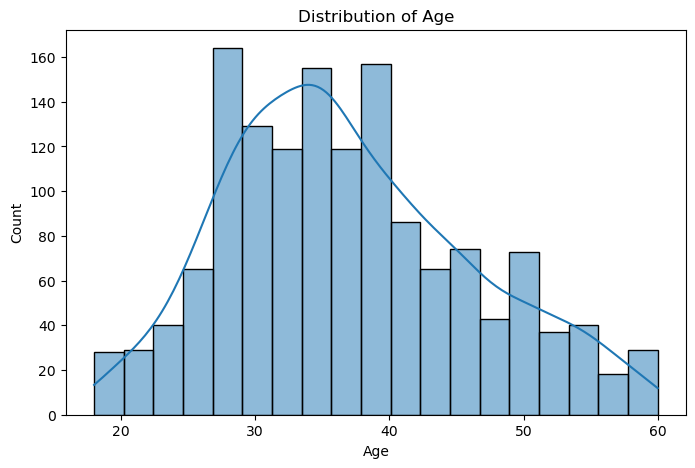

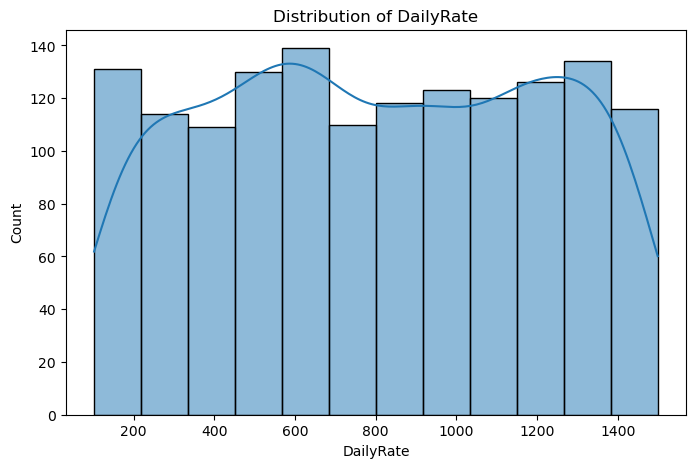

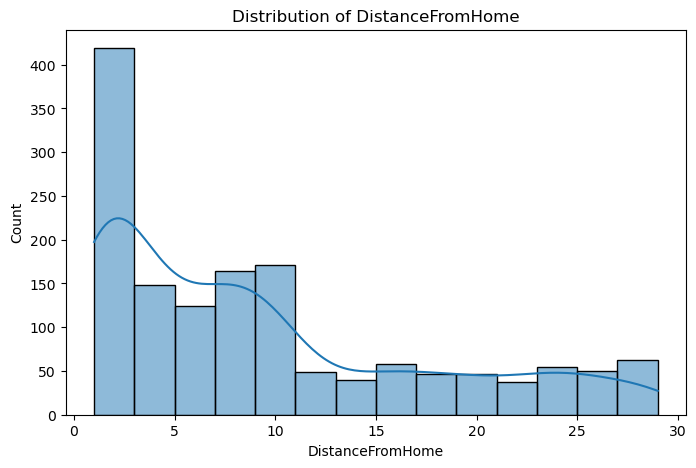

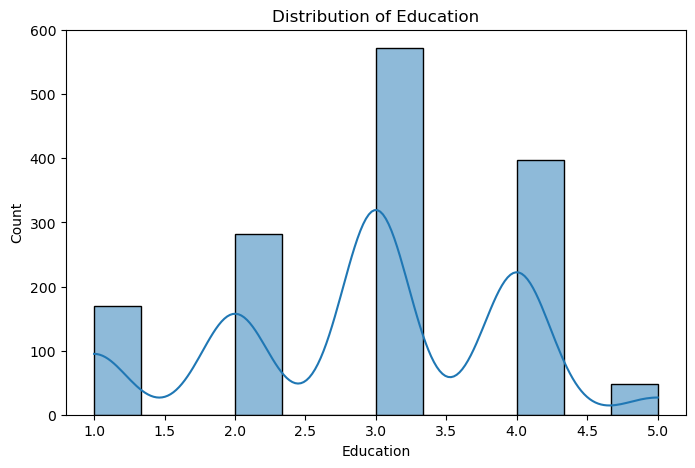

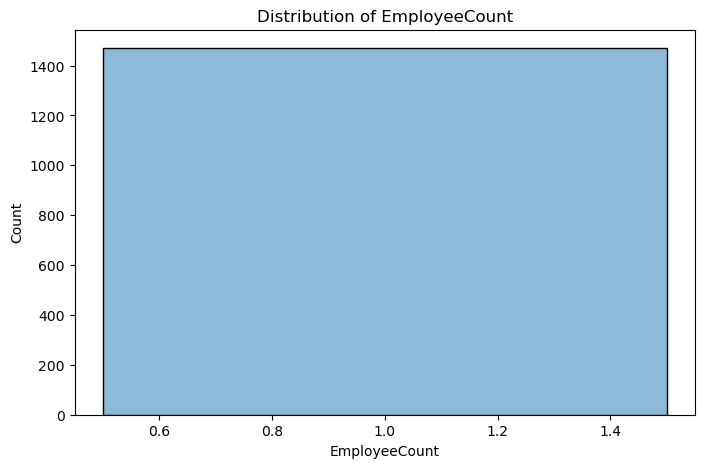

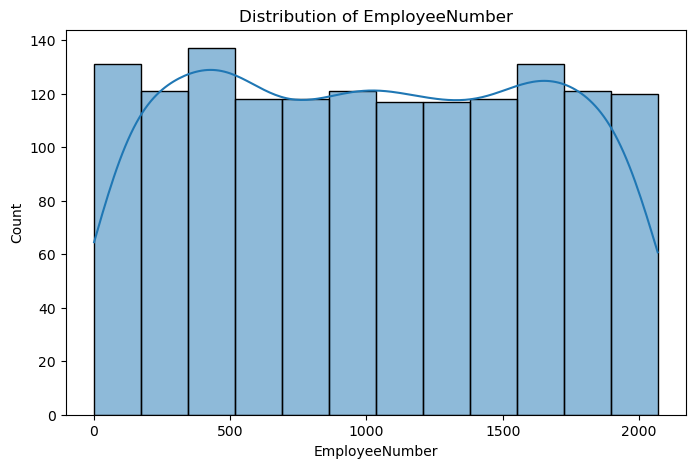

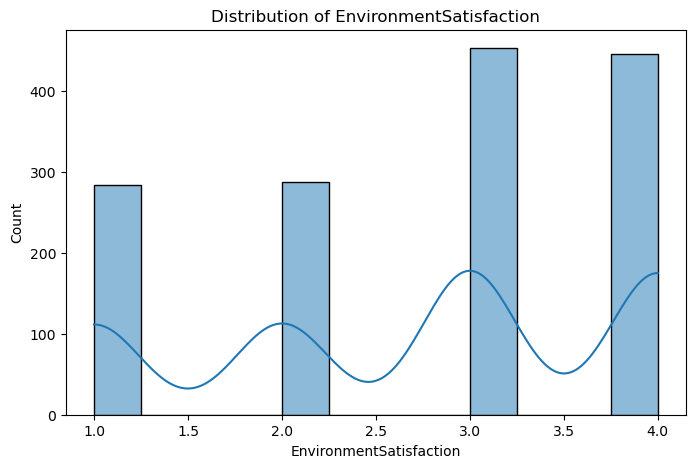

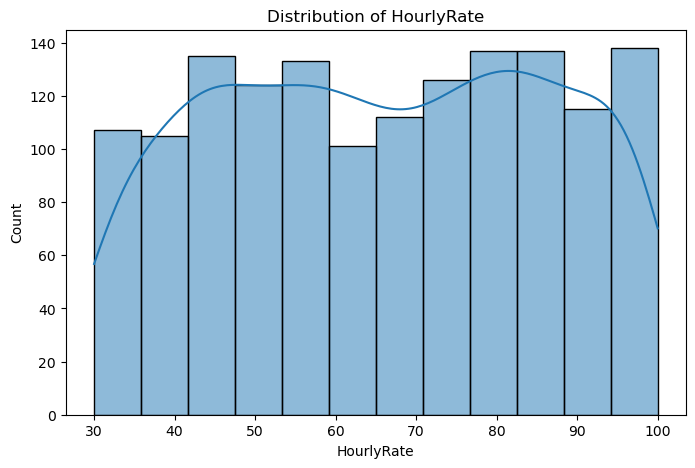

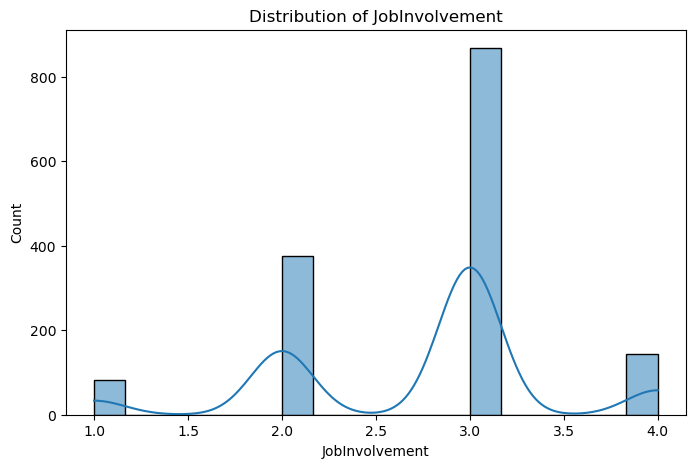

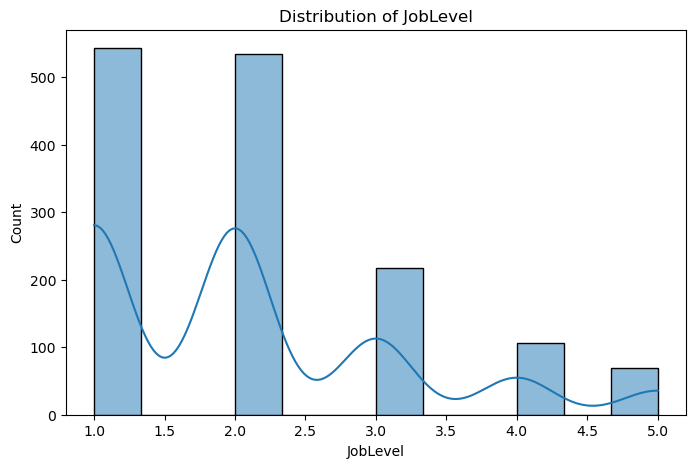

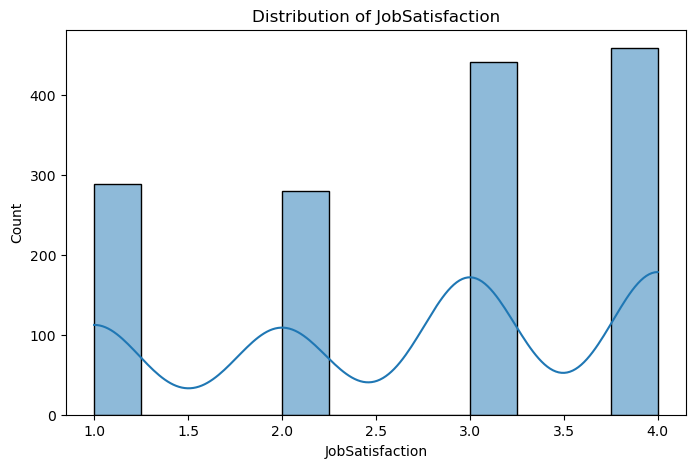

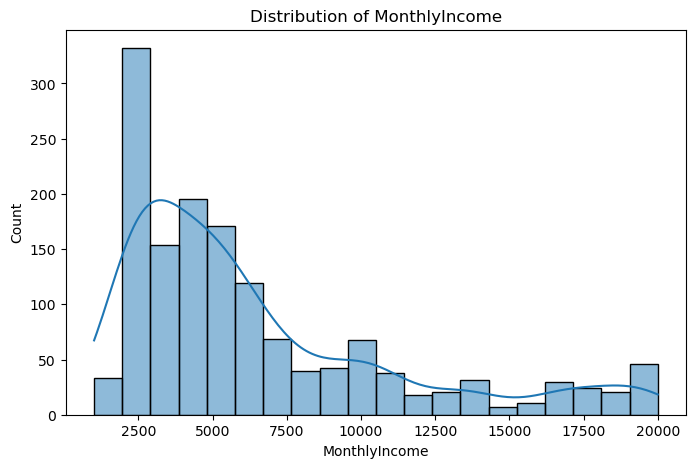

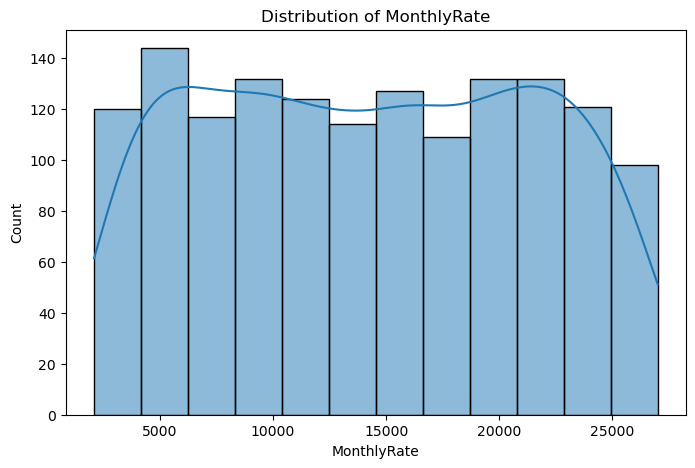

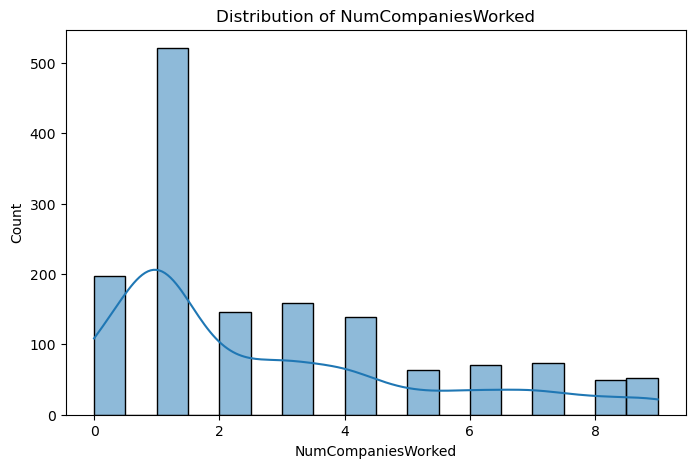

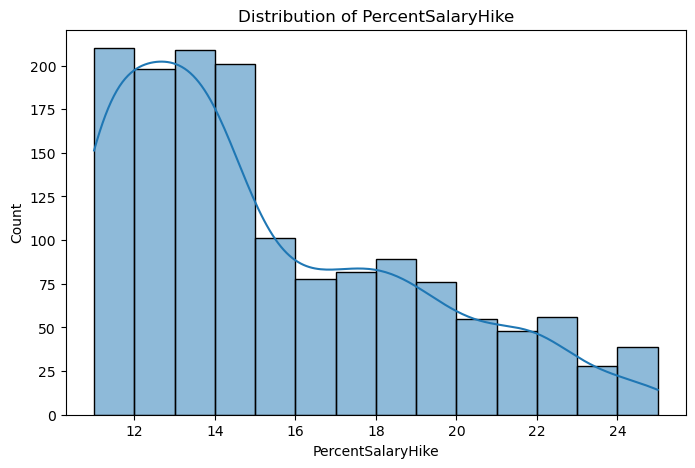

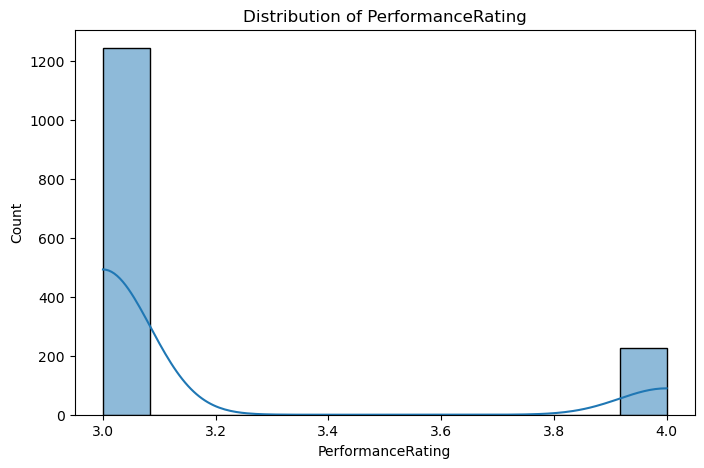

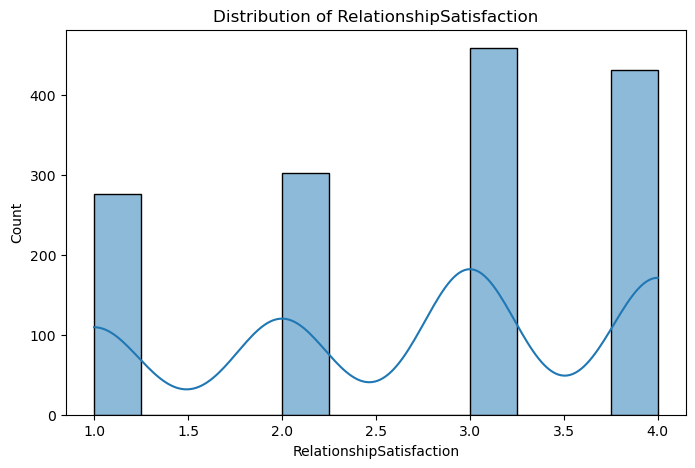

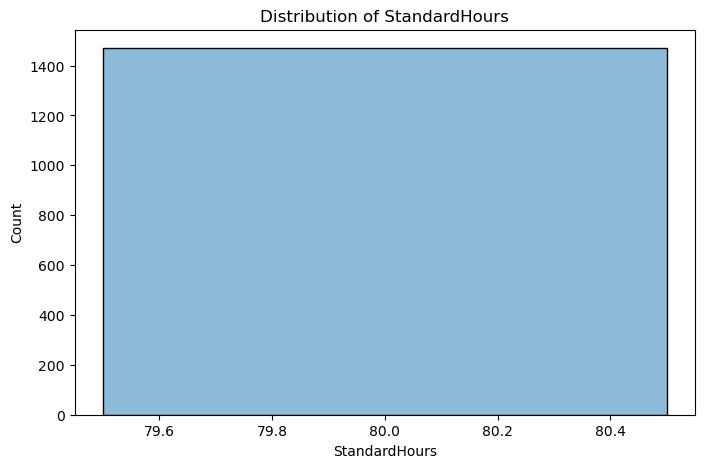

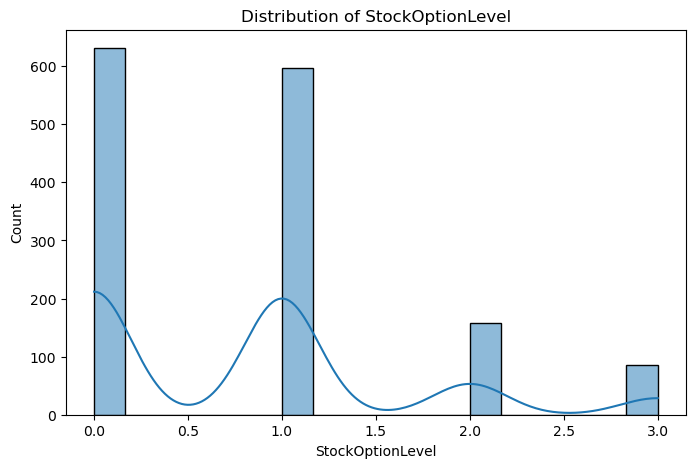

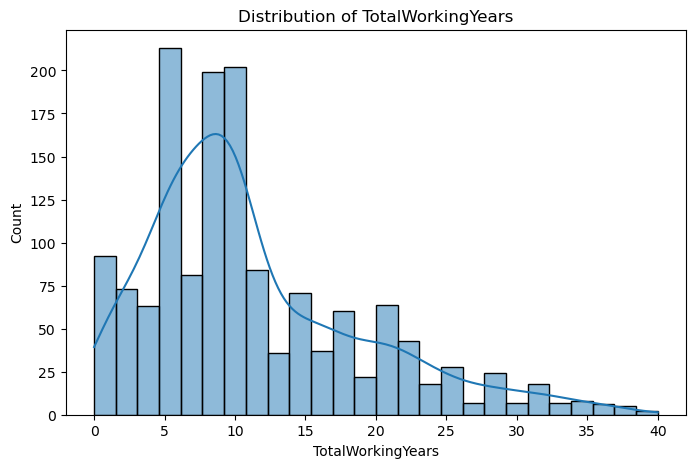

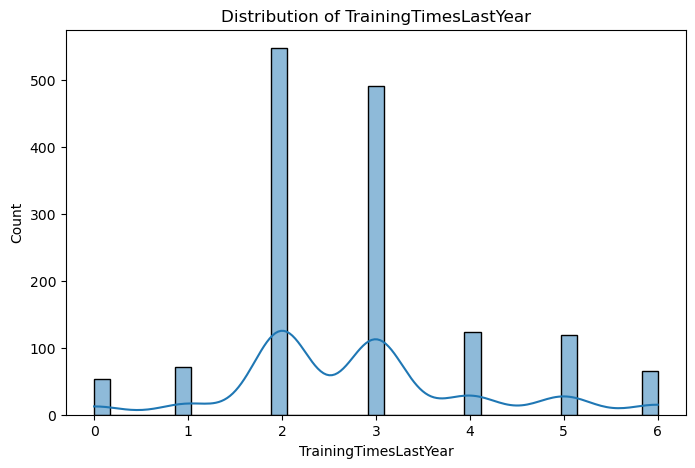

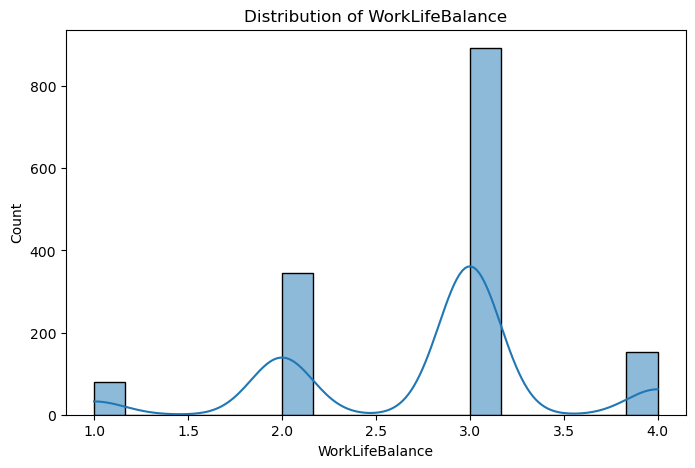

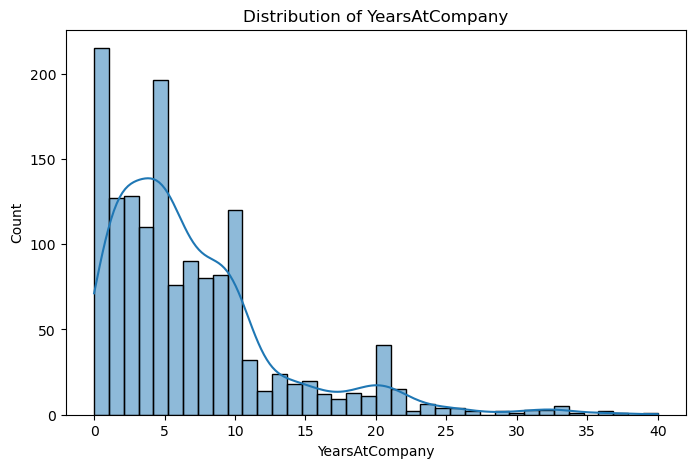

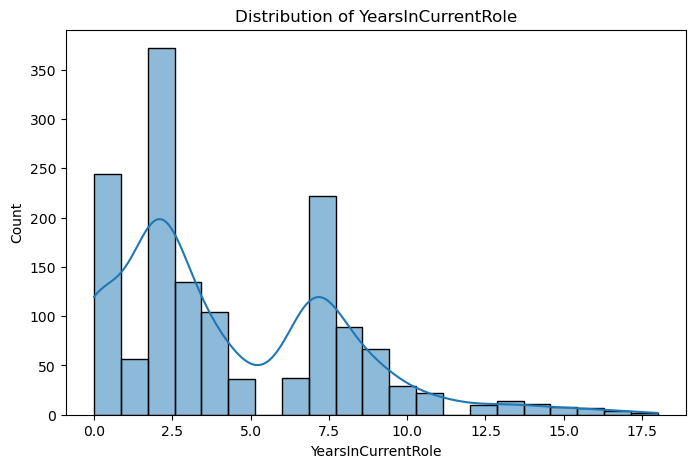

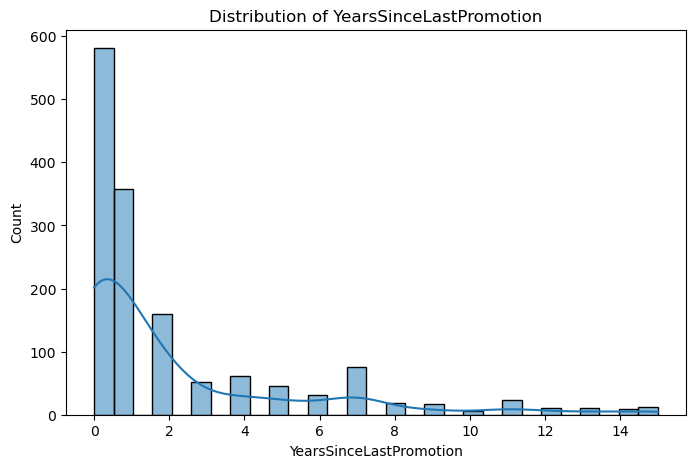

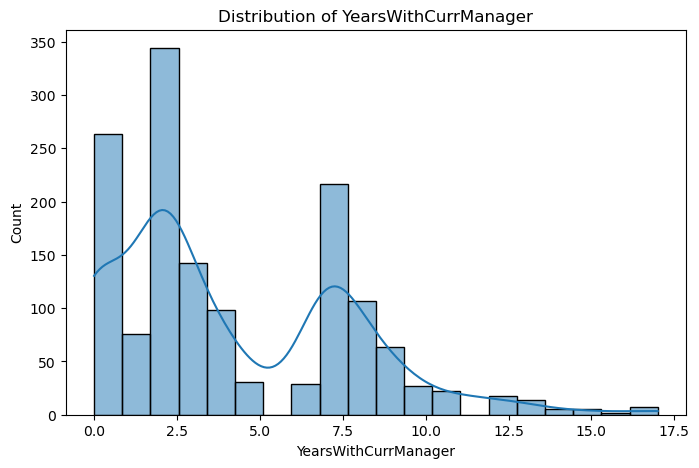

In [35]:
# Visualize distributions of numeric features
numeric_columns = hr_data.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=hr_data, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

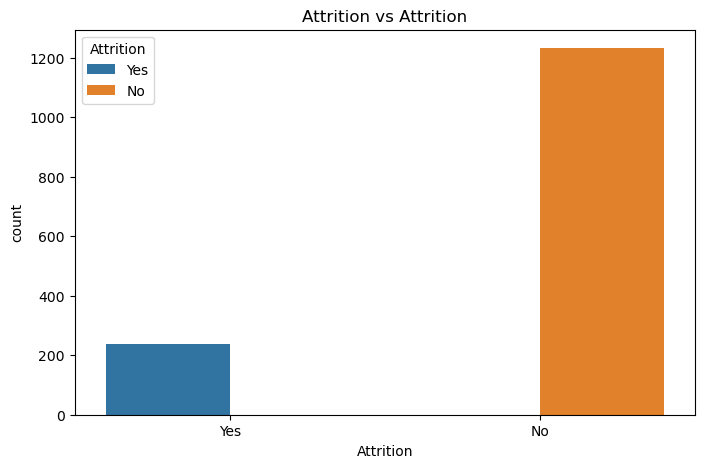

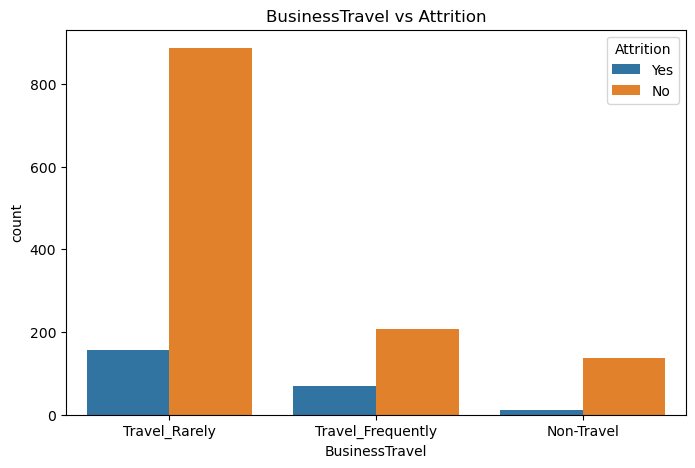

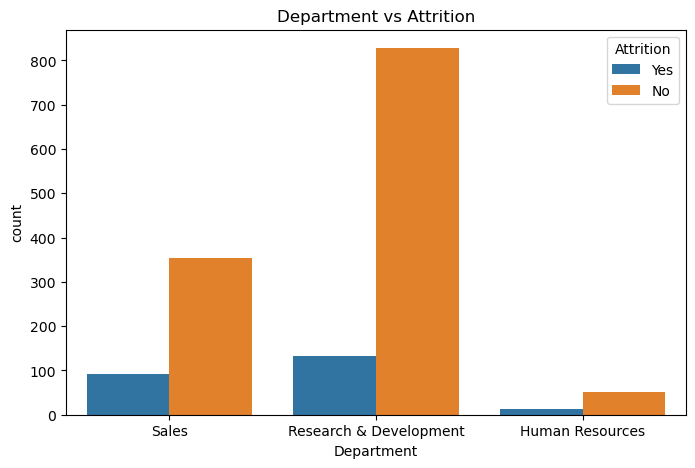

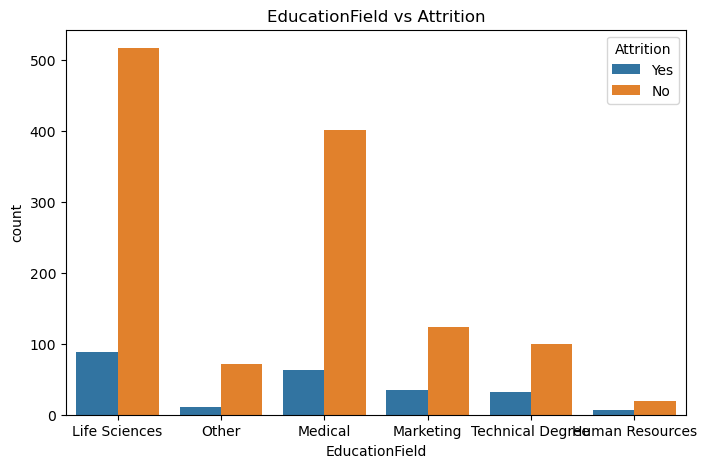

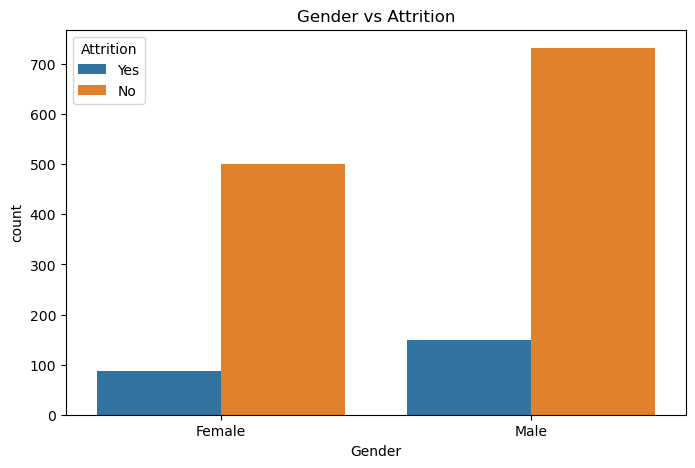

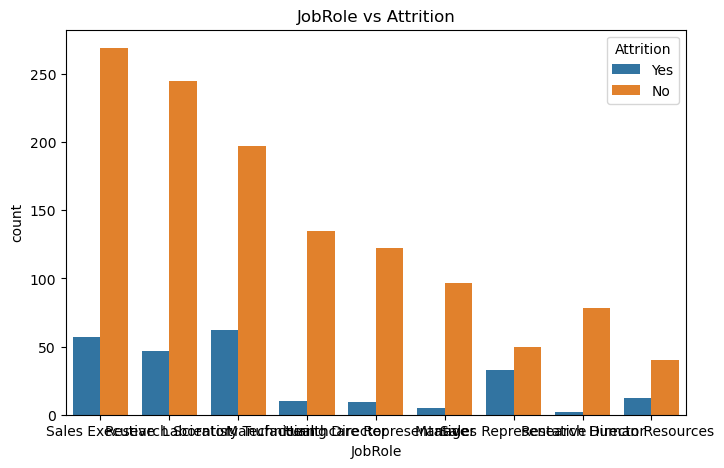

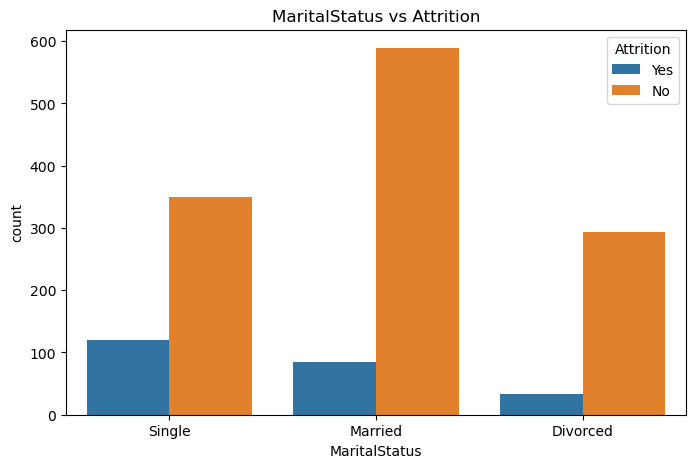

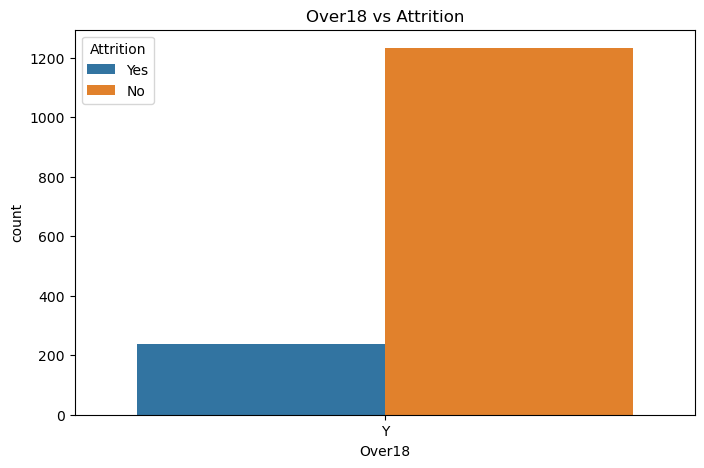

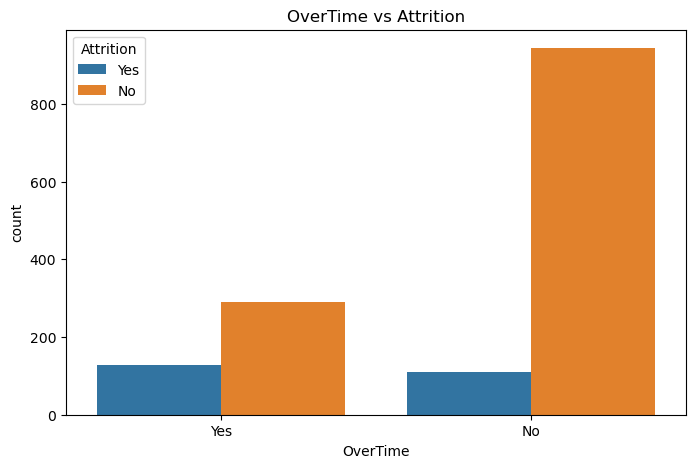

In [36]:
# Visualize relationships between features and target variable using Seaborn
categorical_columns = hr_data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=hr_data, x=column, hue='Attrition')
    plt.title(f'{column} vs Attrition')
    plt.show()
